# Python and R

In [109]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [111]:
%%R

# My commonly used R imports

require('tidyverse')



# Read the data



The cell below loads the data in python and filters down to presidential general election polls only:

In [112]:

df = pd.read_csv('raw-polls.csv')

The cell below loads the same data in R and applies the same filter:

In [113]:
%%R

df <- read_csv('raw-polls.csv') 

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Example Charts

Here are some very basic charts to get you started at looking at how far off these polls have been relative to the actual results of elections (`bias` variable). You will probably need to modify them significantly to get anything meaningful out of your exploratory dataviz. Think about which variables you might need to facet on the histogram (or what you might want to set the y axis to on the dotplot). 

note: This section is just example charts. You don't have to do anything here, just leave these charts as a starting point for you to copy/paste later. Scroll to the next section to get down to work!


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


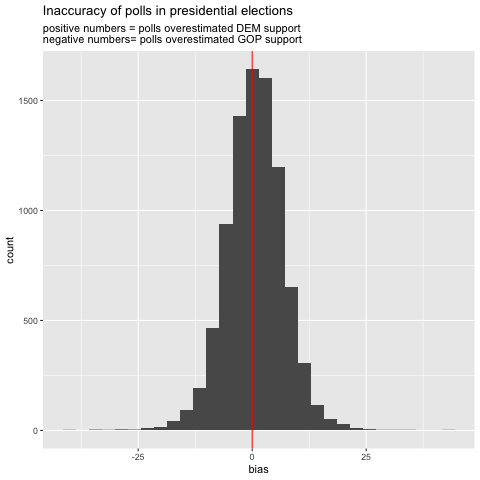

In [114]:
%%R 

ggplot(df) +
    geom_histogram(aes(x=bias)) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )


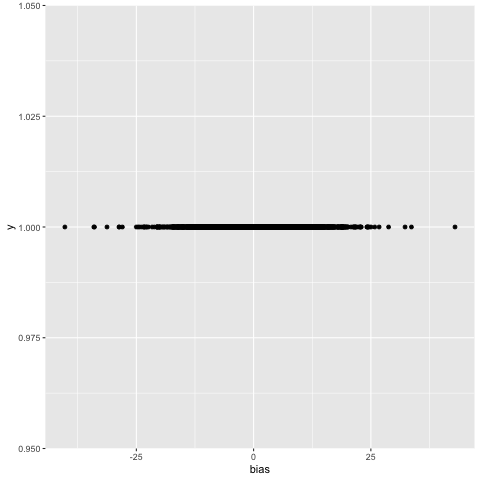

In [115]:
%%R 

ggplot(df) +
    aes(x=bias, y=1) + 
    geom_point() 

# Exploratory Data Visualization

In this section you'll make a few charts to explore the data. For each chart, write a short explanation of what you think you can and cannot conclude from the chart.

### Exploratory chart 1

In [116]:
%%R

new_df <- df %>% 
    filter(type_simple=='Pres-G') %>% # filter to pres general election polls only
    mutate(national = location=="US") %>% # make a new True/False nationwide column
    filter(national==TRUE) %>% # make a new True/False nationwide column
    filter(year=='2020' | year=='2016') 

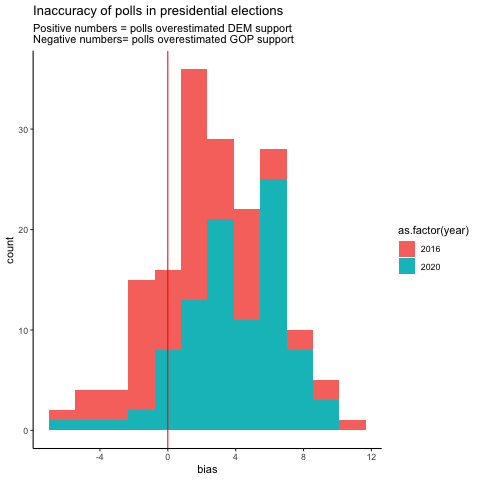

In [117]:

%%R

# 👉Chart 1
# Insert code for a ggplot chart below


ggplot(new_df) +
    geom_histogram(aes(x = bias, fill = as.factor(year)), bins=12) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="Positive numbers = polls overestimated DEM support\nNegative numbers= polls overestimated GOP support",
        ) + theme_classic()
        
#We analyzed the poll results from 2016 and 2020 general elections, and found out that more polls are overestimating DEM support than GOP support. 


👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* We filtered the poll results to only focus on 2016 and 2020 general elections;  

* We analyzed the poll results from both 2016 and 2020 general elections, and found out that more polls are overestimating DEM support than GOP support. 

* Polls of 2020 general elections appears to be more biased than the polls of 2016 general elections. 

What I can't conclude based on this chart:
* We don't know which specific poll's shift between 2016 and 2020 general elections. 
* We don't know which specific poll is less biased than other polls. 
* We don't the trend of bias shift for all years



### Exploratory chart 2

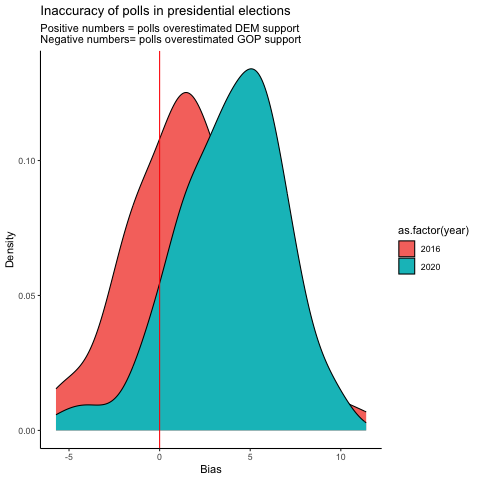

In [118]:
%%R
ggplot(new_df, aes(x = bias, fill = as.factor(year))) +
    geom_density(bins = 12) +
    geom_vline(aes(xintercept = 0), color = 'red') +
    labs(
        title = 'Inaccuracy of polls in presidential elections',
        subtitle = "Positive numbers = polls overestimated DEM support\nNegative numbers= polls overestimated GOP support",
        x = 'Bias',
        y = 'Density'
    ) + 
    scale_fill_manual(values = c("#f7766d", "#03bfc4")) +
    theme_classic()

👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* TKTK 
* TKTK
* TKTK

What I can't conclude based on this chart:
* TKTK 
* TKTK
* TKTK



### Exploratory chart 3

In [119]:
%%R

chart_3 <- df %>% 
    filter(type_simple=='Pres-G') %>% # filter to pres general election polls only
    mutate(national = location=="US") %>% # make a new True/False nationwide column
    filter(national==TRUE) %>% # make a new True/False nationwide column
    filter(year=='2020' | year=='2016') 


In [120]:
%%R
chart_3$bias_color <- ifelse(chart_3$bias < 0, "red", "blue")

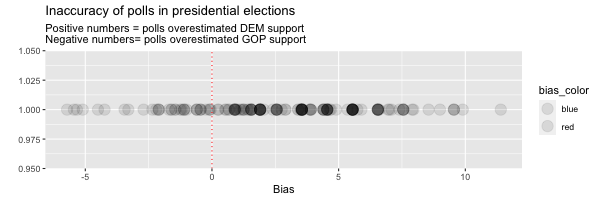

In [121]:
%%R -w 600 -h 200

#color the points based on the bias, to make the left to be red and the right to be blue.
ggplot(chart_3, aes(x=bias, y=1, fill=bias_color)) +
    geom_point(size = 5, alpha = 1/10) +
    geom_vline(aes(xintercept=0), color='red', linetype = "dotted") +
    scale_fill_manual(values=c("red", "blue")) +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="Positive numbers = polls overestimated DEM support\nNegative numbers= polls overestimated GOP support",
        x='Bias',
        y=''
    )

👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* TKTK 
* TKTK
* TKTK

What I can't conclude based on this chart:
* TKTK 
* TKTK
* TKTK



# New Questions

Good exploratory viz generates some answers, but usually lots of new questions. 
What new questions do you have now that you've had a chance to do some exploration with the data?

👉